## Car Price Prediction
For some individual buying a car is one of the big thing, and it's obivous that person will think twice before spending the hard money on the used car. There will be a numer of question that may running like is it worth to buy that car? Price is not to high? Wheter the vehicle would be in good condition if not I can spend x amount of money even if it has problem like that similar problem seller also can face like i'm not placing the high price due to that genuine buyer can't reach out to me? Or I under appreciate the price of car.

This is the commong question among the seller and buyer.

To solve that statment, we can use Linear regression to get the best inference of the car the price using certain features, which will assure both seller, and buyer so that they won't hesistate to make right call.

For that we are scraping the data from one of the leading used car website "Car Dekho" which has 50,000+ car listing, and from that I'm going to pick around 6,000+ to train my model to predict the price.

### Download/Scrape Data

To get started I need to have a real data so to get that I wrote a script which will go to car_dekho website API listing, and retreive the necessary information like 
- 'model_year',  
- 'model_name', 
- 'variant_name',
- 'car_oem', 
- 'owner',
- 'km', 
- 'ft', 
- 'tt',
- 'No. of Doors', 

and many other features, which can be useful for analysing

In [ ]:
# import requests
# import json
# import pandas as pd
# import time

# # CarDekho API URL
# base_url = "https://listing.cardekho.com/api/v1/srp-listings"

# # To hold the unique of vehcile listing
# vehicle_central_id = []
# # Store overall car data from the https://www.cardekho.com/used-cars
# car_data = []
# # Store the detail information about car
# car_spec = {}

# # Pagination pattern
# page_step = 20  # Change this based on observed behavior
# pagination_step = 15
# total_pages = 500  # Adjust as needed

# urls = []  # Store generated URLs

# # Set the header to avoid blocking
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0', 'Referer': 'https://www.google.com/'}

# # Set the number of page to extract and put the parameters to pass while extracting
# # Generate URLs dynamically
# for i in range(total_pages):
#     pagefrom = i * page_step
#     pagination = json.dumps({
#         "common": (i + 1) * pagination_step,
#         "commonFeature": (i + 1) * 5,  # Adjust based on observed behavior
#         "carAd": 0
#     })

#     params = {
#     "cityId": "",
#     "connectoid": "",
#     "sessionid": "a6bde3c9ca870ed1c46b18a5a2d06f5f",
#     "lang_code": "en",
#     "regionId": "0",
#     "searchstring": "used-cars",
#     "sortby": "",
#     "sortorder": "desc",
#     "mink": "",
#     "maxk": "",
#     "dealer_id": "null",
#     "regCityNames": "",
#     "regStateNames": "",
#     "cellValue": "",
#     "device": "web",
#     "userLat": "",
#     "userLng": "",
#     "platform": "web",
#     "pagefrom": pagefrom,
#     "pagination": pagination  # JSON formatted pagination
# }

#     response = requests.get(base_url, params=params, headers=headers)
    
#     # If the status is 200, then execute the following lines of code, and store data in json 
#     if response.status_code == 200:
#         data = response.json()

#     # Store the necessary infomration that I want to keep    
#     for car in data['data']['cars']:
#         car_data.append({
#                         'usedCarId': car['usedCarId'],'centralVariantId': car['centralVariantId'], 'model_year': car['myear'], 'model_name': car['model'],
#                         'variant_name': car['variantName'], 'car_oem': car['oem'],'car_type': car['bt'],'owner': car['owner'], 'owner_slug': car['ownerSlug'],
#                         'km': car['km'], 'ft': car['ft'], 'tt': car['tt'], 'msp': car['msp'], 'city': car['city']
#                         })
#         # Also making note of centralVariantId to find more details about car
#         vehicle_central_id.append(car['centralVariantId'])
    
#     time.sleep(1.5)

# # Required Features
# required_features = [
#     "Engine Type", "Displacement", "Max Power", "Max Torque", "No. of Cylinders", "Valves Per Cylinder", "Emission Norm Compliance","Drive Type", "Gearbox", "Steering Type",
#     "Drive Type", "Mileage", "Length", "Width", "Height", "Ground Clearance Unladen", "Kerb Weight","Seating Capacity", "Wheel Base", "No. of Doors"
# ]

# #  Above just extracted handful of information about car, and seller, but the following line of code will extract the car technical information
# row_extracted = 0
# for vlink_id in vehicle_central_id:
#     # https://www.cardekho.com/api/v1/usedcar/specs?&cityId=&connectoid=&sessionid=dc58effe83d533529880f6db5f2ca75a&lang_code=en&regionId=0&otherinfo=all&variantId=1549
#     specs_url = f"https://www.cardekho.com/api/v1/usedcar/specs?variantId={vlink_id}&otherinfo=all"
#     specs_response = requests.get(specs_url, headers=headers)
    
#     # Check for the response status, and move forward to store 
#     if specs_response.status_code == 200:
#         specs_data = specs_response.json()
        
#         for features in specs_data['data']['carSpecification']['data']:
#             for inner_feature in features['list']:
#                 key = inner_feature['key']
#                 value = inner_feature['value']
                
#                 # Store only required features
#                 if key in required_features:
#                     if vlink_id not in car_spec:
#                         car_spec[vlink_id] = {}  # Store as dictionary

#                     car_spec[vlink_id][key] = value  # Save as key-value pair

#         row_extracted += 1
#         print(f"No. of row {row_extracted} extracted sucessfully!")
#         time.sleep(1.5)

#     else:
#         print(f"Failed to fetch specs for {vlink_id}")


# # Convert dictionary to Pandas DataFrame
# car_data_df = pd.DataFrame(car_data)

# car_spec_df = pd.DataFrame.from_dict(car_spec, orient="index").reset_index()
# car_spec_df.rename(columns={"index": "centralVariantId"}, inplace=True)

# # Merge with car_data
# merged_df = car_data_df.merge(car_spec_df, on="centralVariantId", how="inner")

# # Save file into csv
# merged_df.to_csv("cardekho.csv", index=False)

As the data is now available I'm ready to install the necessary libraries, and start doing the EDA, Data processing task so that our model is equip with the right data so that it won't struggle a bit to provide you the best price according to the given features. 

### Load the Data

In [516]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

In [703]:
# Load the car data
car_df = pd.read_csv("og_cardekho.csv")
car_df.head(5)

,centralVariantId,model_year,model_name,variant_name,car_oem,owner,owner_slug,km,ft,tt,...,Emission Norm Compliance,Steering Type,Length,Width,Height,Seating Capacity,Wheel Base,Kerb Weight,No. of Doors,Ground Clearance Unladen
0,8321,2022,Jeep Compass,Model S DCT BSVI,Jeep,1,first-owner,"21,000",Petrol,Automatic,...,BS VI,Power,4405 mm,1818 mm,1640 mm,5,2636 mm,1580 kg,5.0,NaN
1,10582,2023,BMW 3 Series Gran Limousine,320Ld M Sport,BMW,1,first-owner,"1,623",Diesel,Automatic,...,BS VI 2.0,Electric,4823 mm,1827 mm,1441 mm,5,2400 mm,1640 kg,4.0,NaN
2,12204,2024,Audi Q7,Technology,Audi,0,unregistered,"3,500",Petrol,Automatic,...,BS VI 2.0,Electric,5072 mm,1970 mm,1705 mm,7,3000 mm,NaN,5.0,NaN
3,10568,2024,Audi Q3 Sportback,40TFSI Quattro,Audi,0,unregistered,"6,100",Petrol,Automatic,...,BS VI 2.0,Electric,4518 mm,2022 mm,1558 mm,5,2651 mm,1595 kg,5.0,NaN
4,6837,2022,Mercedes-Benz GLC,200,Mercedes-Benz,2,second-owner,"22,000",Petrol,Automatic,...,BS VI,Power,4658 mm,1890 mm,1644 mm,5,2873 mm,1585 kg,5.0,NaN


In [704]:
# Check the shape of a data
print(f"There are {car_df.shape[0]} rows, and {car_df.shape[1]} columns in the dataset.")

There are 5980 rows, and 31 columns in the dataset.


In [705]:
# Get the information about dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   centralVariantId          5980 non-null   int64  
 1   model_year                5980 non-null   int64  
 2   model_name                5980 non-null   object 
 3   variant_name              5980 non-null   object 
 4   car_oem                   5980 non-null   object 
 5   owner                     5980 non-null   int64  
 6   owner_slug                5980 non-null   object 
 7   km                        5980 non-null   object 
 8   ft                        5980 non-null   object 
 9   tt                        5980 non-null   object 
 10  msp                       5980 non-null   int64  
 11  city                      5980 non-null   object 
 12  locality                  5382 non-null   object 
 13  Engine Type               5681 non-null   object 
 14  Displace

#### Check Missing Values

This all are the columns names where the missing value exists.

In [706]:
count_of_missing = car_df[car_df.columns[car_df.isnull().sum() > 0]].isnull().sum().reset_index(name="count").rename(columns={"index": "col_name", "0":"count"})
count_of_missing

,col_name,count
0,locality,598
1,Engine Type,299
2,Drive Type,718
3,Steering Type,897
4,Wheel Base,299
5,Kerb Weight,1076
6,No. of Doors,299
7,Ground Clearance Unladen,3767


In [7]:
# Percentage of missing information
count_of_missing['percentage_%'] = (count_of_missing['count'] / car_df.shape[0] * 100).round()

In [8]:
count_of_missing

,col_name,count,percentage_%
0,locality,598,10.0
1,Engine Type,299,5.0
2,Drive Type,718,12.0
3,Steering Type,897,15.0
4,Wheel Base,299,5.0
5,Kerb Weight,1076,18.0
6,No. of Doors,299,5.0
7,Ground Clearance Unladen,3767,63.0


#### Check Duplicated Values

In [709]:
car_df.duplicated().sum()

5959

In [707]:
car_df.shape[0] - car_df['centralVariantId'].duplicated().sum()

20

Here duplicated value will be present because model can come multiple times.

### Data Cleaning

After the intial evaluation let's clean the data so first start with the standardizing the column name

In [529]:
# clean a column names
car_df.columns = car_df.columns.str.replace(" ", "_").str.lower()
car_df.columns

Index(['centralvariantid', 'model_year', 'model_name', 'variant_name',
       'car_oem', 'owner', 'owner_slug', 'km', 'ft', 'tt', 'msp', 'city',
       'locality', 'engine_type', 'displacement', 'max_power', 'max_torque',
       'no._of_cylinders', 'valves_per_cylinder', 'gearbox', 'drive_type',
       'emission_norm_compliance', 'steering_type', 'length', 'width',
       'height', 'seating_capacity', 'wheel_base', 'kerb_weight',
       'no._of_doors', 'ground_clearance_unladen'],
      dtype='object')

There are column like ft, and tt which is abbrevations of fuel_type, transmission_type, and msp. 

In [530]:
# Rename column_name for clarity
car_df.rename(columns={"ft":"fuel_type", "tt": "transmission_type", "msp":"price"}, inplace=True)

In [531]:
# Check null data in engine_type
car_df[car_df['engine_type'].isnull()][['car_oem', 'variant_name']].nunique()
# or
car_df.groupby(car_df['engine_type'].isnull() == False)['car_oem'].value_counts().head(1)
# or
car_df[car_df['engine_type'].isnull()][['car_oem', 'model_name']].value_counts()

car_oem  model_name
BMW      BMW XM        1
Name: count, dtype: int64

There are 299 missing value in engine type, and when I run the above code it's show it's related to BMW specific model. To fix this I can check engine type from internet and impute that value.

In [532]:
# Impute engine_type of BMW
car_df['engine_type'].fillna("4.4-litre V8 Petrol Engine", inplace=True)

Let's fix the number of doors

In [533]:
car_df.groupby(car_df['no._of_doors'].isnull()==False)['car_oem'].value_counts().head(1)

no._of_doors  car_oem   
False         Land Rover    1
Name: count, dtype: int64

Now get into more details of Land Rover

In [534]:
car_df.loc[(car_df['model_name'] == "Land Rover Range Rover Sport") &
           (car_df['variant_name'] == "3.0 Diesel Dynamic HSE"),
           ['model_name', 'variant_name', 'steering_type', 'no._of_doors', 'ground_clearance_unladen']
]

,model_name,variant_name,steering_type,no._of_doors,ground_clearance_unladen
17,Land Rover Range Rover Sport,3.0 Diesel Dynamic HSE,NaN,NaN,NaN


Let's impute the steering_type, no._of_doors, and ground_clearance_unladen with the right data extracted from internet.

In [535]:
car_df.loc[
    (car_df['model_name'] == "Land Rover Range Rover Sport") &
    (car_df['variant_name'] == "3.0 Diesel Dynamic HSE"),
    'ground_clearance_unladen'
] = 216

car_df.loc[
    (car_df['model_name'] == "Land Rover Range Rover Sport") &
    (car_df['variant_name'] == "3.0 Diesel Dynamic HSE"),
    'no._of_doors'
] = 5

car_df.loc[
    (car_df['model_name'] == "Land Rover Range Rover Sport") &
    (car_df['variant_name'] == "3.0 Diesel Dynamic HSE"),
    'steering_type'
] = "Electric Power Steering"

As the one car detail was manually imputed with the available data from internet.

In [536]:
car_df['wheel_base'].fillna("2651 mm", inplace=True)

In drive_type 718 values are null. Let's check which car_oem is responsible for it.

In [537]:
car_df.groupby(car_df['drive_type'].isnull() == False)[['car_oem', 'model_name']].value_counts().head(2)

drive_type  car_oem  model_name    
False       Renault  Renault Kiger     2
            Nissan   Nissan Magnite    1
Name: count, dtype: int64

There are some null values in drive_type, so before imputing first check what are the unique values that are available

In [538]:
# Check unique type of drive_type
car_df.drive_type.unique()

array(['4x2', 'RWD', 'AWD', 'FWD', nan, '4WD', '2WD'], dtype=object)

In [539]:
car_df.loc[
    (car_df['model_name'] == 'Renault Kiger'),
    'drive_type'
] = "FWD"

car_df.loc[
    (car_df['model_name'] == 'Renault Kiger'),
    'drive_type'
] = "FWD"

car_df.loc[
    (car_df['model_name'] == "Nissan Magnite"),
    'drive_type'
] = "FWD"

Afte cleaning null value of drive_type let's see how we can fix steering_type

In [540]:
car_df.groupby(car_df['steering_type'].isnull() == False)[['car_oem', 'model_name']].value_counts().head(2)

steering_type  car_oem  model_name   
False          Jaguar   Jaguar F-Pace    1
               Tata     Tata Tigor       1
Name: count, dtype: int64

In [541]:
# Impute Tata Information
car_df.loc[(car_df['car_oem'] == "Tata") & 
(car_df['model_name'] == "Tata Tigor"),
"steering_type",
] = "Power Steering"

car_df.loc[(car_df['car_oem'] == "Tata") & 
(car_df['model_name'] == "Tata Tigor"),
"ground_clearance_unladen",
] = "170 mm"

car_df.loc[(car_df['car_oem'] == "Tata") & 
(car_df['model_name'] == "Tata Tigor"),
"kerb_weight",
] = "1035 kg"

In [542]:
car_df.steering_type.unique()

array(['Power', 'Electric', nan, 'Power Steering',
       'Electric Power Steering', 'Electrical', 'Electronic'],
      dtype=object)

In [543]:
# Impute Jaguar information
car_df.loc[(car_df['car_oem'] == "Jaguar") & 
(car_df['model_name'] == "Jaguar F-Pace"),
"steering_type",
] = "Electric Power Steering "

car_df.loc[(car_df['car_oem'] == "Jaguar") & 
(car_df['model_name'] == "Jaguar F-Pace"),
"ground_clearance_unladen",
] = "213 mm"

# Impute Audi Q7 information
car_df.loc[
    (car_df['car_oem'] == 'Audi') & 
    (car_df['model_name'] == 'Audi Q7'),
    'kerb_weight', 
    ] = "2270 kg"

car_df.loc[
    (car_df['car_oem'] == 'Audi') & 
    (car_df['model_name'] == 'Audi Q7'),
    'ground_clearance_unladen', 
    ] = "200 mm"

# Impute Hyundai Exter Information
car_df.loc[
    (car_df['car_oem'] == 'Hyundai') & 
    (car_df['model_name'] == 'Hyundai Exter'),
    'kerb_weight', 
    ] = "1010 kg"

car_df.loc[
    (car_df['car_oem'] == 'Hyundai') & 
    (car_df['model_name'] == 'Hyundai Exter'),
    'ground_clearance_unladen', 
    ] = "185 mm"

# Impute MG Astor Information
car_df.loc[
    (car_df['car_oem'] == 'MG') & 
    (car_df['model_name'] == 'MG Astor'),
    'kerb_weight', 
    ] = "1275 kg"

car_df.loc[
    (car_df['car_oem'] == 'MG') & 
    (car_df['model_name'] == 'MG Astor'),
    'ground_clearance_unladen', 
    ] = "180 mm"


In [544]:
# Check kerb_weight
car_df.groupby(car_df['ground_clearance_unladen'].isnull() == False)[['car_oem', 'model_name']].value_counts().head(14)

ground_clearance_unladen  car_oem        model_name                 
False                     Audi           Audi Q3 Sportback              1
                                         Audi Q5                        1
                                         Audi Q8                        1
                          BMW            BMW 3 Series Gran Limousine    1
                                         BMW XM                         1
                          Jeep           Jeep Compass                   1
                          Mercedes-Benz  Mercedes-Benz GLC              1
True                      Mercedes-Benz  Mercedes-Benz GLE              2
                          Renault        Renault Kiger                  2
                          Audi           Audi Q7                        1
                          Hyundai        Hyundai Exter                  1
                                         Hyundai Verna                  1
                                         Hy

Verify the data of the particular oem, and model name to ensure that every model is same.

In [ ]:
car_df[(car_df['car_oem'] == 'Mercedes-Benz') & 
(car_df['model_name'] == 'Mercedes-Benz GLC')].sample(5)

In [546]:
# Audi Ground Clearance Impute
car_df.loc[
    (car_df['car_oem'] == 'Audi') & 
    (car_df['model_name'] == 'Audi Q3 Sportback'),
    'ground_clearance_unladen', 
    ] = "170 mm"

car_df.loc[
    (car_df['car_oem'] == 'Audi') & 
    (car_df['model_name'] == 'Audi Q5'),
    'ground_clearance_unladen', 
    ] = "200 mm"

car_df.loc[
    (car_df['car_oem'] == 'Audi') & 
    (car_df['model_name'] == 'Audi Q8'),
    'ground_clearance_unladen', 
    ] = "254 mm"

# BMW Ground Clearance Impute
car_df.loc[
    (car_df['car_oem'] == 'BMW') & 
    (car_df['model_name'] == 'BMW 3 Series Gran Limousine'),
    'ground_clearance_unladen', 
    ] = "165 mm"

car_df.loc[
    (car_df['car_oem'] == 'BMW') & 
    (car_df['model_name'] == 'BMW XM'),
    'ground_clearance_unladen', 
    ] = "205 mm"

# Jeep Ground Clearance Impute
car_df.loc[
    (car_df['car_oem'] == 'Jeep') & 
    (car_df['model_name'] == 'Jeep Compass'),
    'ground_clearance_unladen', 
    ] = "178 mm"

car_df.loc[
    (car_df['car_oem'] == 'Mercedes-Benz') & 
    (car_df['model_name'] == 'Mercedes-Benz GLC'),
    'ground_clearance_unladen', 
    ] = "201 mm"


In [547]:
car_df.isnull().sum()

centralvariantid            0
model_year                  0
model_name                  0
variant_name                0
car_oem                     0
owner                       0
owner_slug                  0
km                          0
fuel_type                   0
transmission_type           0
price                       0
city                        0
locality                    2
engine_type                 0
displacement                0
max_power                   0
max_torque                  0
no._of_cylinders            0
valves_per_cylinder         0
gearbox                     0
drive_type                  0
emission_norm_compliance    0
steering_type               0
length                      0
width                       0
height                      0
seating_capacity            0
wheel_base                  0
kerb_weight                 0
no._of_doors                0
ground_clearance_unladen    0
dtype: int64

##### Drop

In [548]:
# Drop centralvariantid, owner_slug
car_df.drop(columns=["centralvariantid", "owner_slug", "locality"], axis=1, inplace=True)

In [549]:
missing_free_df = car_df

In [550]:
missing_free_df.columns

Index(['model_year', 'model_name', 'variant_name', 'car_oem', 'owner', 'km',
       'fuel_type', 'transmission_type', 'price', 'city', 'engine_type',
       'displacement', 'max_power', 'max_torque', 'no._of_cylinders',
       'valves_per_cylinder', 'gearbox', 'drive_type',
       'emission_norm_compliance', 'steering_type', 'length', 'width',
       'height', 'seating_capacity', 'wheel_base', 'kerb_weight',
       'no._of_doors', 'ground_clearance_unladen'],
      dtype='object')

Standardize the data

To standardize data first we have to check what are the uniques values are available in the columns, once we find the information we can group with right mapping.

In [551]:
# Check for all the unique value
check_standardize_col_name = ['car_oem', 'owner', 'fuel_type', 'transmission_type', 'city', 'gearbox', 'drive_type', 'emission_norm_compliance', 'steering_type', 'seating_capacity', 'no._of_doors']
for col_name in check_standardize_col_name:
    print(f"{col_name}: {missing_free_df[col_name].unique().tolist()}")

car_oem: ['Jeep', 'BMW', 'Audi', 'Mercedes-Benz', 'Hyundai', 'Renault', 'Jaguar', 'Tata', 'Land Rover', 'MG', 'Nissan']
owner: [1, 0, 2]
fuel_type: ['Petrol', 'Diesel']
transmission_type: ['Automatic', 'Manual']
city: ['Kolkata', 'Coimbatore', 'Guwahati', 'Gurgaon', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad']
gearbox: ['7 Speed DCT', '8-Speed AT', '7-Speed', '9 speed Tronic', '9G-TRONIC', '7-Speed AT', '5 Speed', '5 Speed AMT', '8-Speed', '5-Speed AMT', '5-Speed']
drive_type: ['4x2', 'RWD', 'AWD', 'FWD', '4WD', '2WD']
emission_norm_compliance: ['BS VI', 'BS VI 2.0', 'BSIV', 'BS IV']
steering_type: ['Power', 'Electric', 'Electric Power Steering ', 'Power Steering', 'Electric Power Steering', 'Electrical', 'Electronic']
seating_capacity: [5, 7]
no._of_doors: [5.0, 4.0]


As you can see there are some inconsistency in drive_type, emission_norm_compliance, and steering_type.

In [552]:
# Fix inconsistency in drive_type
missing_free_df['drive_type'].replace({
    '4x2': '2WD',
    '2WD': '2WD',
    'RWD': '2WD',
    '4WD': '4WD',
    'FWD': '4WD',
    'AWD': '4WD',

}, inplace=True)

missing_free_df['drive_type'].unique()

array(['2WD', '4WD'], dtype=object)

In [553]:
# Fix inconsistency in emission_norm_compliance
missing_free_df['emission_norm_compliance'].replace({
    'BSIV': 'BS IV'
}, inplace=True)

missing_free_df['emission_norm_compliance'].unique()

array(['BS VI', 'BS VI 2.0', 'BS IV'], dtype=object)

In [554]:
missing_free_df['steering_type'].unique()

array(['Power', 'Electric', 'Electric Power Steering ', 'Power Steering',
       'Electric Power Steering', 'Electrical', 'Electronic'],
      dtype=object)

In [555]:
# Fix inconsistency in steering_type
steering_type_map = {
    'Power': 'Power Steering',
    'Power Steering': 'Power Steering',
    'Electric' : 'Electric Power Steering',
    'Electric Power Steering': 'Electric Power Steering',
    'Electric Power Steering ': 'Electric Power Steering',
    'Electrical': 'Electric Power Steering',
    'Electronic': 'Electric Power Steering'
}

missing_free_df['steering_type'] = missing_free_df['steering_type'].map(steering_type_map)

missing_free_df['steering_type'].unique()

array(['Power Steering', 'Electric Power Steering'], dtype=object)

In [556]:
# Fix inconsitency in gear_box
gear_box_map = {
    '7 Speed DCT': '7-Speed DCT',
    '7-Speed': '7-Speed DCT',
    '7-Speed AT': '7-Speed AT',

    '8-Speed AT': '8-Speed AT',
    '8-Speed': '8-Speed AT',
    
    '9 speed Tronic': '9-Speed AT',
    '9G-TRONIC': '9-Speed AT',

    '5 Speed': '5-Speed MT',
    '5-Speed': '5-Speed MT',
    '5 Speed AMT': '5-Speed AMT',
    '5-Speed AMT': '5-Speed AMT'
}

missing_free_df['gearbox'] = missing_free_df['gearbox'].map(gear_box_map)
missing_free_df['gearbox'].unique()

array(['7-Speed DCT', '8-Speed AT', '9-Speed AT', '7-Speed AT',
       '5-Speed MT', '5-Speed AMT'], dtype=object)

##### Set right data type

kerb_weight(kg) to int
no_of_doors to int
ground_clearance_unladen(mm) int 

In [557]:
# km convert to int or float
missing_free_df['km'] = missing_free_df['km'].replace(",", "", regex=True).astype(int)

# displacement convert to int
missing_free_df['displacement(cc)'] = missing_free_df['displacement'].str.extract("(\d+)").astype(int)

# max_power convert to int
missing_free_df['max_power(bhp)'] = missing_free_df['max_power'].str.extract("(\d+)").astype(int)

# max_torque convert to int
missing_free_df['max_torque(Nm)'] = missing_free_df['max_torque'].str.extract("(\d+)").astype(int)

# wheel_base convert to int
missing_free_df['wheel_base(mm)'] = missing_free_df['wheel_base'].str.extract("(\d+)").astype(int)

# length convert to int
missing_free_df['length(mm)'] = missing_free_df['length'].str.extract("(\d+)").astype(int)

# width convert to int
missing_free_df['width(mm)'] = missing_free_df['width'].str.extract("(\d+)").astype(int)

# height convert to int
missing_free_df['height(mm)'] = missing_free_df['height'].str.extract("(\d+)").astype(int)

# height convert to int
missing_free_df['kerb_weight(kg)'] = missing_free_df['kerb_weight'].str.extract("(\d+)").astype(int)

# no_of_doors to int
missing_free_df['no_of_doors'] = missing_free_df['no._of_doors'].astype(int)

# ground_clearance_unladen to int
missing_free_df['ground_clearance_unladen(mm)'] = missing_free_df['ground_clearance_unladen'].str.extract("(\d+)").astype(float)


In [558]:
missing_free_df.loc[
    (car_df['model_name'] == "Land Rover Range Rover Sport") &
    (car_df['variant_name'] == "3.0 Diesel Dynamic HSE"),
    'ground_clearance_unladen(mm)'
] = 216

In [ ]:
remove_col = ['displacement', 'max_power', 'no._of_doors', 'ground_clearance_unladen', 'wheel_base','kerb_weight', 'height', 'width', 'max_torque', 'length']
for col_name in remove_col:
    missing_free_df.drop(columns=remove_col, inplace=True)

In [560]:
missing_free_df.isnull().sum()

model_year                      0
model_name                      0
variant_name                    0
car_oem                         0
owner                           0
km                              0
fuel_type                       0
transmission_type               0
price                           0
city                            0
engine_type                     0
no._of_cylinders                0
valves_per_cylinder             0
gearbox                         0
drive_type                      0
emission_norm_compliance        0
steering_type                   0
seating_capacity                0
displacement(cc)                0
max_power(bhp)                  0
max_torque(Nm)                  0
wheel_base(mm)                  0
length(mm)                      0
width(mm)                       0
height(mm)                      0
kerb_weight(kg)                 0
no_of_doors                     0
ground_clearance_unladen(mm)    0
dtype: int64

In [561]:
clean_car_df = missing_free_df.copy()

#### Handling Outliers

In [562]:
outlier_data_check_list = ['model_year','km','price', 'displacement(cc)', 'max_power(bhp)', 'max_torque(Nm)', 'length(mm)',
                            'width(mm)', 'height(mm)', 'kerb_weight(kg)', 'ground_clearance_unladen(mm)', 'wheel_base(mm)']

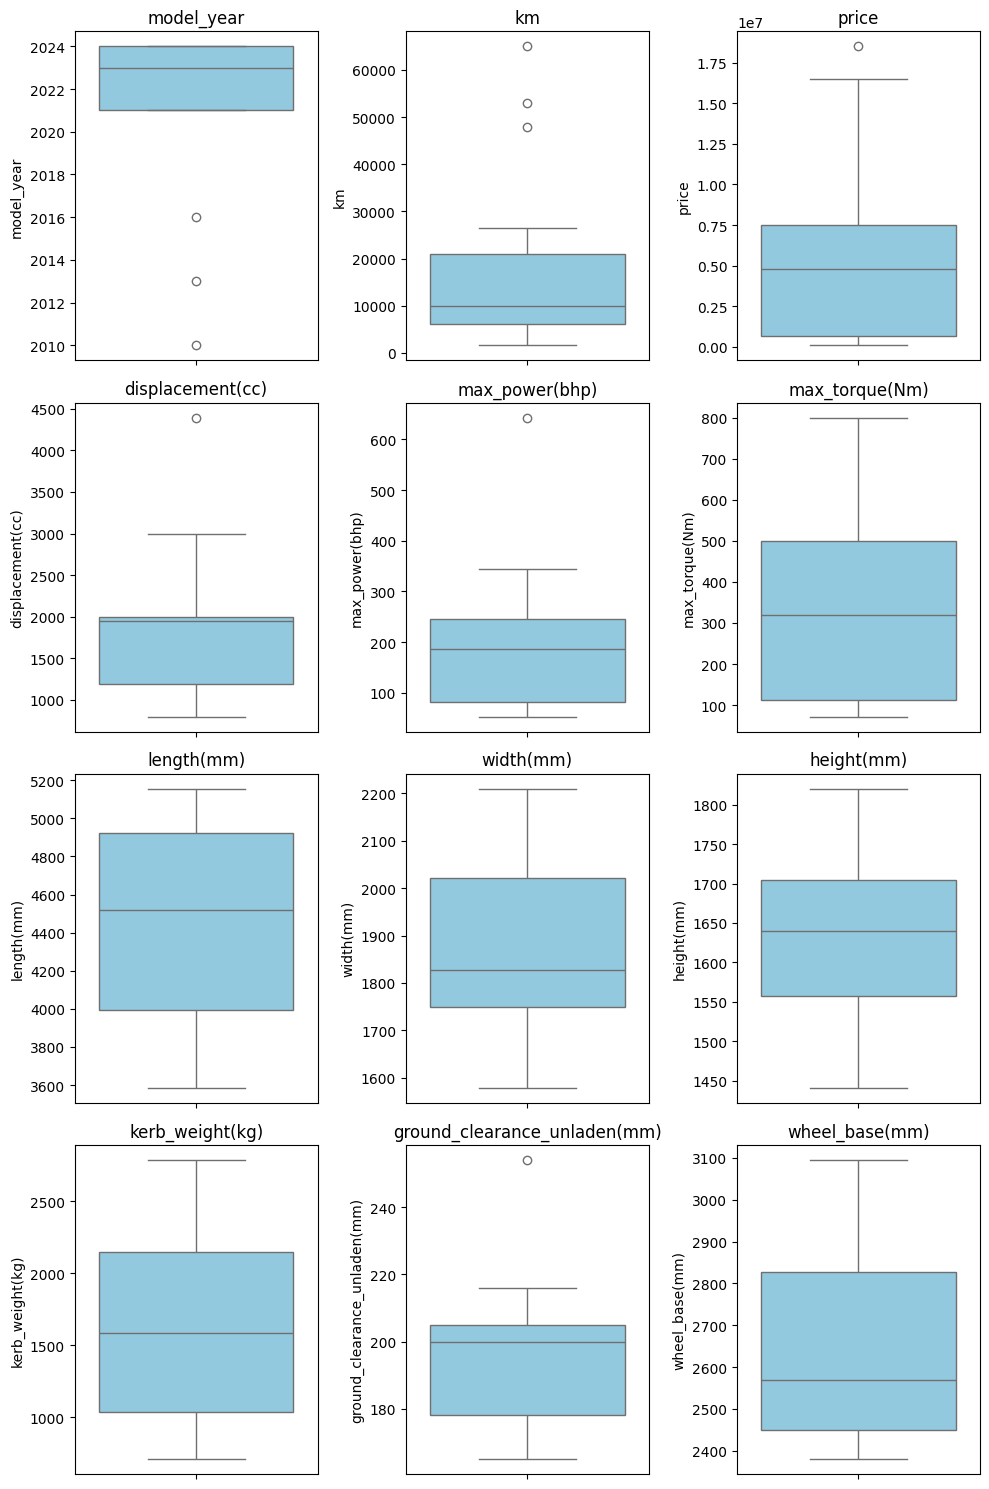

In [563]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(10, 3 * 5))
axes = axes.flatten()

for i, col_name in enumerate(outlier_data_check_list):
    sns.boxplot(y=clean_car_df[col_name], ax=axes[i], color='skyblue')
    axes[i].set_title(col_name)
    
plt.tight_layout()
plt.show()

In [ ]:
# Outlier Detection

### Feature Engineering

Now, will do some transformation on the data prior to that let's save the file into a system.

In [564]:
#clean_car_df.drop(columns=['car_km_log', 'price_log'], inplace=True)
clean_car_df.to_csv("clean_car.csv")
df = clean_car_df.copy()

Since both kilometers and price can vary significantly across different car models, their raw values may dominate the model’s learning process. 

To prevent the model from prioritizing these features excessively, we apply a log transformation. This transformation not only scales down large values but also helps in normalizing the distribution, making it more symmetric and suitable for linear regression-based models.

In [565]:
# log tansform on km and price
df['car_km_log'] = np.log(df['km'] + 1)
df.insert(df.columns.get_loc('km') + 1, 'car_km_log', df.pop('car_km_log'))

df['price_log'] = np.log(df['price'] + 1)
df.insert(df.columns.get_loc("price") + 1, 'price_log', df.pop('price_log'))

### Scaling

As we move forward in building our model, we need to convert nominal categorical data into a numerical format that machine learning algorithms can interpret. To achieve this, we use **one-hot encoding**, which creates new binary columns for each unique category in a feature. 

Whenever a particular category is present in a data point, its corresponding column is marked as **True (1)**, while all other category columns remain **False (0)**. 

This approach helps preserve categorical information without introducing any ordinal relationships, ensuring that the model treats them correctly.

In [566]:
# One hot encoding
df = pd.get_dummies(df, columns=['fuel_type', 'transmission_type', 'city', 'drive_type',
                                 'emission_norm_compliance', 'steering_type'], drop_first=True)

Above, we applied **one-hot encoding** to transform nominal categorical variables. Now, we will use **label encoding** for features such as `"model_name"`, `"variant_name"`, `"car_oem"`, `"engine_type"`, and `"gearbox"`. Label encoding assigns a unique numerical value to each category within these features, allowing the model to process them as numerical inputs.

This approach is particularly useful when dealing with categorical variables that have many unique values, helping to reduce dimensionality compared to one-hot encoding. 

However, since label encoding introduces an ordinal relationship, it should only be used when the categorical values do not have a meaningful rank or order.

In [567]:
# Label encoding for categorical value
label_cols = ['model_name', 'variant_name', 'car_oem', 'engine_type', 'gearbox']
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

Finally, we will apply the StandardScaler to the numerical columns, ensuring that all features are scaled such that they have a mean of 0 and a standard deviation of 1.
 
This standardization process helps to bring all features to the same scale, improving the performance and stability of many machine learning algorithms.

In [568]:
# Scale Numerical Features (excluding `price_log`)
num_cols = [
    "car_km_log", "length(mm)", "width(mm)", "height(mm)", "displacement(cc)", 
    "max_power(bhp)", "max_torque(Nm)", "wheel_base(mm)", "kerb_weight(kg)", 
    "ground_clearance_unladen(mm)"
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### Model Building

After completing the preliminary steps of data preprocessing and scaling, we are now ready to build a model to predict car prices using the available features. 

First, we will split the data into training and testing sets. Then, we will start with **Linear Regression** to predict the car prices. If the performance of the linear model is not satisfactory, we will explore and experiment with other models to enhance accuracy and robustness.

### Linear Regression

We are using Linear Regression because we are interested in predicting the car price based on the available features. Linear Regression is a good choice when you want to make predictions with a clear linear relationship between the dependent variable (car price) and independent variables (features). 

In [569]:
from sklearn.model_selection import train_test_split

# Remove price, price_log from the X dataset
X = df.drop(columns=["price", "price_log"])
# Store the price value
y = df["price_log"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now that the model is created, it's time to evaluate its performance using various metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

In [570]:
# Check Accuracy/Evaluation
y_pred_log = model.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Mean Absolute Error (MAE), which measures the average absolute difference 
# between the actual and predicted values. A lower MAE indicates better model performance.
mae = mean_absolute_error(y_actual, y_pred_actual)

# Root Mean Squared Error (RMSE), which penalizes larger errors more 
# than MAE. A lower RMSE signifies a more accurate model.
rmse = root_mean_squared_error(y_actual, y_pred_actual)

# R-squared score, which indicates how well the model explains the 
# variance in the actual values. A value closer to 1 suggests the model fits the data well
r_score = r2_score(y_actual, y_pred_actual)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"r2_score: {r_score}")

RMSE: 2331531.898382459
MAE: 1795936.0048229515
r2_score: 0.8309162365434941


The model shows extremely low RMSE and MAE, along with a perfect R² score of 1.0.

These results suggest potential overfitting, as the model might be too closely fitted to the training data and may not generalize well to new data.

One way to address potential overfitting is to check for **multicollinearity**, which occurs when multiple features are highly correlated, causing the model to become confused. We can detect multicollinearity using the **Variance Inflation Factor (VIF)**. By identifying and removing the correlated columns, we can reduce the noise and retrain the model to improve its performance."

In [571]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_num = df[num_cols]  # Select only numerical features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data)

                        Feature        VIF
0                    car_km_log   2.646596
1                    length(mm)  30.460289
2                     width(mm)  11.731125
3                    height(mm)  10.951543
4              displacement(cc)  31.494726
5                max_power(bhp)  69.296193
6                max_torque(Nm)  32.007249
7                wheel_base(mm)   6.945226
8               kerb_weight(kg)  99.850773
9  ground_clearance_unladen(mm)   3.304844


Now, let's identify the columns that are highly correlated by calculating the Variance Inflation Factor (VIF). Once we identify the features with high multicollinearity, we can remove them and retrain the model to evaluate the improved performance

In [572]:
X = df.drop(columns=["price", "price_log", "km", "max_power(bhp)", 
                     "kerb_weight(kg)", "displacement(cc)", "height(mm)"])  # Drop original price & km
y = df["price_log"]  # Target: Log-transformed price

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

mae = mean_absolute_error(y_actual, y_pred_actual)
rmse = root_mean_squared_error(y_actual, y_pred_actual)
r_score = r2_score(y_actual, y_pred_actual)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"r2_score: {r_score}")

RMSE: 3129394.298661532
MAE: 2427571.952525051
r2_score: 0.6953930860640389


It seems that removing or adding features didn’t lead to significant improvements in model performance, which could indicate that the current model and features may not be the best fit for predicting car prices.

### Ridge Regression

As the Linear Regression model didn't gave the satisfactory results due to multicollinearity, we are switching to Ridge Regression. 

Ridge Regression helps mitigate overfitting by adding a penalty term to the model, which reduces the impact of highly correlated features. This technique allows us to achieve more stable and reliable results, even in the presence of multicollinearity.

In [573]:
X = df.drop(columns=["price", "price_log", "km"])
y = df["price_log"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression Model
ridge = Ridge(alpha=0.001)  # Use best alpha value
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

Let's check the result of the prediction. 

In [574]:
# Prediction
y_pred_log = ridge.predict(X_test)

# Convert log prices back to actual
y_pred_actual = np.expm1(y_pred_log)

# Convert true log prices back to actual
y_actual = np.expm1(y_test)  

# Evaluation
mae = mean_absolute_error(y_actual, y_pred_actual)
rmse = root_mean_squared_error(y_actual, y_pred_actual)
r_score = r2_score(y_actual, y_pred_actual)
scores = cross_val_score(ridge, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"r2_score: {r_score}")
print("Cross-Validation RMSE:", np.abs(scores.mean()))

RMSE: 2258159.2294105925
MAE: 1758584.4085711148
r2_score: 0.8413908247805639
Cross-Validation RMSE: 0.5320821788226906


The Ridge Regression model performed significantly better than Linear Regression, so for now, we’ll stop here and move on to exploring **Random Forest** to see how it responds to this dataset.

### Random Forest

Random Forest Regressor is also a great option since it uses multiple decision trees to capture complex patterns in the data, often leading to better and more reliable predictions.

In [576]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Convert log prices back to actual prices
y_pred_actual_rf = np.expm1(y_pred_rf)
y_actual = np.expm1(y_test)

# Calculate RMSE & MAE
rmse_rf = mean_squared_error(y_actual, y_pred_actual_rf, squared=False)
mae_rf = mean_absolute_error(y_actual, y_pred_actual_rf)
r_score = r2_score(y_actual, y_pred_actual)


print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"r2_score: {r_score}")


Random Forest RMSE: 3225100.444572978
Random Forest MAE: 1989055.594632341
r2_score: 0.8413908247805639


The results from Random Forest were not as good as expected, so we will focus on refining the Ridge Regression model and explore potential optimization techniques to improve its performance.

### Optimization

For optimization, we will test different alpha values using cross-validation with multiple folds, then train the model and evaluate the results using **GridSearchCV**, which will help us find the best alpha.

In [577]:
# Define Ridge regression model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_["alpha"]
print(f"Best Alpha: {best_alpha}")

# Train Ridge with best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Make predictions
y_pred_log = ridge_best.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)  # Convert log prices back to actual prices
y_actual = np.expm1(y_test)

# Calculate RMSE and MAE
mae = mean_absolute_error(y_actual, y_pred_actual)
rmse = root_mean_squared_error(y_actual, y_pred_actual)
r_score = r2_score(y_actual, y_pred_actual)
scores = cross_val_score(ridge, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"r2_score: {r_score}")
print("Cross-Validation RMSE:", np.abs(scores.mean()))

Best Alpha: 1
RMSE: 2073872.1554196074
MAE: 1504738.845907218
r2_score: 0.8662224789750976
Cross-Validation RMSE: 0.5177062824085625


Now let's update the alpha value to ge the Ridge Regression to get the most accurate value.

In [578]:
X = df.drop(columns=["price", "price_log", "km"])
y = df["price_log"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression Model
ridge = Ridge(alpha=1)  # Use best alpha value
ridge.fit(X_train, y_train)

Ridge(alpha=1)

Let me pick any random value to check the score.

In [ ]:
sample = X_test[5:6]  # Pick one test row
sample_pred = np.expm1(ridge.predict(sample))  # Convert log price back
print(f"Predicted Price: {sample_pred[0]}")

## Final Insights & Learnings

This project has been a great learning opportunity, starting from web scraping to data cleaning, analysis, and modeling. 

While working through the pipeline, I encountered several real-world challenges and mistakes, which ultimately helped me develop a deeper understanding of the data science workflow.

One of the first mistakes I made was overlooking duplicate values. Initially, I assumed they were valid due to multiple OEMs and models, but later realized I should have investigated further. 

This assumption led to noisy data, affecting the later stages of analysis.

Moving to modeling, Linear Regression initially showed a perfect R² score of 1, which was a clear sign of overfitting. Suspecting multicollinearity, I removed highly correlated features, but instead of improving, the model’s performance degraded further. 

To address this, I introduced Ridge Regression to control overfitting, which worked to an extent but still left room for optimization.

To refine the model, I applied GridSearchCV for hyperparameter tuning. 

However, when testing the model with random data, I discovered a major issue—the dataset had only 8 OEMs, which seemed incorrect. Upon investigation, I found that the web scraping process had only extracted a single page of data due to a pagination issue.

This was a critical lesson: always validate the source data thoroughly before moving ahead, as any oversight in the early stages can render later efforts meaningless.

I'm currently working on fixing the scraping issue and will re-run the entire pipeline—from analysis to modeling—ensuring the process is more robust. This experience reinforced that mistakes are an integral part of real-world data science, and each challenge presents an opportunity to learn and improve.